## **Query Routing using Artificial Intelligence (AI)**

### Group: 5 (Section: 4)

#### Members:

- Urmi Vijaykumar Patel - 0756341

- Venkata Hanuman Sai Kumar Kaparaju - 0753837

- Yasminbanu Suleman Shaikh - 0754285



### Business Problem:

- Healthy consumer experiences generate business satisfaction, drive additional revenue and provide constructive jaws. Banking is one of consumer requests' core domains. With these demands increasing steadily, the customer care teams have trouble interpreting and distinguishing inquiries from the departments in question. It takes time and is not cost-effective. As a consequence, consumers tend to leave the organization.

- Well-established contact with consumers that is required to address the customer's questions and problems. To bridge the gap between the customers and the business, we will create a query routing system using AI.

### Analytical Goals:

- Building a Long Short-Term Memory (LSTM) neural network model-based Query routing system.

- Using Exploratory data analysis (EDA) to display the most frequent words and count of queries with respect to their departments.

- Using Machine Learning technique i.e., Natural Language Processing (NLP) and Deep Learning Technique i.e., Recurrent Neural Network (LSTM), which helps in text processing and categorizing the queries from customer requests and allocate them to the respective departments such as Credit, Debt, Loan, Mortgage and General Queries.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Standard Libraries

In [2]:
import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import tensorflow as tf
import numpy as np


# Importing Dataset

We are using pandas library to load the dataset using read_csv() function.

In [3]:

import io
import pandas as pd

df =pd.read_csv('/content/drive/My Drive/Customer_complaints_cleaned.csv')

In [4]:
df.head(9)

,Date received,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,PRODUCT
0,2017-03-21,NaN,Incorrect information on credit report,Information is not mine,NaN,Company has responded to the consumer and the ...,EXPERIAN DELAWARE GP,TX,77075,Older American,NaN,Phone,2017-03-21,Closed with non-monetary relief,Yes,No,2397100,Credit Issues
1,2017-04-19,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not disclosed as an attempt to collect,NaN,NaN,"Security Credit Services, LLC",IL,60643,NaN,NaN,Web,2017-04-20,Closed with explanation,Yes,No,2441777,Debts Issues
2,2017-04-19,NaN,Other,NaN,NaN,Company has responded to the consumer and the ...,"CITIBANK, N.A.",IL,62025,NaN,NaN,Referral,2017-04-20,Closed with explanation,Yes,No,2441830,Credit Issues
3,2017-04-14,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,Company believes it acted appropriately as aut...,"Shellpoint Partners, LLC",CA,90305,NaN,NaN,Referral,2017-04-14,Closed with explanation,Yes,No,2436165,Mortgage Issues
4,2017-04-19,NaN,Credit determination,NaN,NaN,Company has responded to the consumer and the ...,U.S. BANCORP,LA,70571,NaN,NaN,Postal mail,2017-04-21,Closed with explanation,Yes,No,2441726,Credit Issues
5,2017-04-18,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"Rubin & Rothman, LLC",NY,14063,NaN,NaN,Referral,2017-04-19,In progress,Yes,No,2440364,Debts Issues
6,2017-04-18,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,"QUICKEN LOANS, INC.",FL,33772,Older American,NaN,Referral,2017-04-19,In progress,Yes,No,2441409,Mortgage Issues
7,2016-05-18,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,Company has responded to the consumer and the ...,"WELLS FARGO BANK, NATIONAL ASSOCIATION",NJ,8618,NaN,NaN,Referral,2016-05-23,Closed with explanation,Yes,No,1931957,Mortgage Issues
8,2017-03-17,Checking account,"Making/receiving payments, sending money",NaN,NaN,Company believes it acted appropriately as aut...,UNITED SERVICES AUTOMOBILE ASSOCIATION,WI,54005,NaN,NaN,Referral,2017-03-20,Closed with explanation,Yes,No,2393048,General Issues


# Data Pre-Processing

The dataset has 777959 rows and 18 columns out of which we are using Issue and Product columns.

We are eliminating other columns due to high number of null values and irrelevant with problem statement. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777959 entries, 0 to 777958
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 777959 non-null  object
 1   Sub-product                   542822 non-null  object
 2   Issue                         777959 non-null  object
 3   Sub-issue                     320986 non-null  object
 4   Consumer complaint narrative  157865 non-null  object
 5   Company public response       197884 non-null  object
 6   Company                       777959 non-null  object
 7   State                         772056 non-null  object
 8   ZIP code                      772001 non-null  object
 9   Tags                          109264 non-null  object
 10  Consumer consent provided?    288311 non-null  object
 11  Submitted via                 777959 non-null  object
 12  Date sent to company          777959 non-null  object
 13 

In [6]:
df.shape

(777959, 18)

Checking Null Values

In [7]:
df.isnull().sum()

Date received                        0
Sub-product                     235137
Issue                                0
Sub-issue                       456973
Consumer complaint narrative    620094
Company public response         580075
Company                              0
State                             5903
ZIP code                          5958
Tags                            668695
Consumer consent provided?      489648
Submitted via                        0
Date sent to company                 0
Company response to consumer         0
Timely response?                     0
Consumer disputed?                9545
Complaint ID                         0
PRODUCT                              0
dtype: int64

creating a copy of original dataframe

In [8]:
df1=df

In [9]:
df1

,Date received,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,PRODUCT
0,2017-03-21,NaN,Incorrect information on credit report,Information is not mine,NaN,Company has responded to the consumer and the ...,EXPERIAN DELAWARE GP,TX,77075,Older American,NaN,Phone,2017-03-21,Closed with non-monetary relief,Yes,No,2397100,Credit Issues
1,2017-04-19,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not disclosed as an attempt to collect,NaN,NaN,"Security Credit Services, LLC",IL,60643,NaN,NaN,Web,2017-04-20,Closed with explanation,Yes,No,2441777,Debts Issues
2,2017-04-19,NaN,Other,NaN,NaN,Company has responded to the consumer and the ...,"CITIBANK, N.A.",IL,62025,NaN,NaN,Referral,2017-04-20,Closed with explanation,Yes,No,2441830,Credit Issues
3,2017-04-14,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,Company believes it acted appropriately as aut...,"Shellpoint Partners, LLC",CA,90305,NaN,NaN,Referral,2017-04-14,Closed with explanation,Yes,No,2436165,Mortgage Issues
4,2017-04-19,NaN,Credit determination,NaN,NaN,Company has responded to the consumer and the ...,U.S. BANCORP,LA,70571,NaN,NaN,Postal mail,2017-04-21,Closed with explanation,Yes,No,2441726,Credit Issues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777954,2016-12-21,NaN,Other fee,NaN,NaN,NaN,TD BANK US HOLDING COMPANY,NY,11743,NaN,NaN,Referral,2016-12-22,Closed with monetary relief,Yes,No,2259452,Credit Issues
777955,2013-06-28,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,"ARVEST BANK GROUP, INC.",NY,11423,NaN,NaN,Referral,2013-07-02,Closed with explanation,Yes,No,445400,Mortgage Issues
777956,2013-02-13,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",DE,19803,NaN,NaN,Referral,2013-02-15,Closed with non-monetary relief,Yes,No,317273,Mortgage Issues
777957,2014-09-15,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,NaN,NaN,Ditech Financial LLC,MO,64053,NaN,NaN,Web,2014-09-19,Closed with explanation,Yes,Yes,1029658,Mortgage Issues


Extraction of Issue and Product columns from the original dataset.

In [10]:
df=df[['Issue','PRODUCT']]

In [11]:
df

,Issue,PRODUCT
0,Incorrect information on credit report,Credit Issues
1,Disclosure verification of debt,Debts Issues
2,Other,Credit Issues
3,"Loan modification,collection,foreclosure",Mortgage Issues
4,Credit determination,Credit Issues
...,...,...
777954,Other fee,Credit Issues
777955,"Loan servicing, payments, escrow account",Mortgage Issues
777956,"Loan modification,collection,foreclosure",Mortgage Issues
777957,"Loan servicing, payments, escrow account",Mortgage Issues


Replacing the values of the product column from credit issues to credit department and followed by other issues as well using rename() funtion.

In [12]:
df.replace(to_replace='Credit Issues',value='Credit Department',inplace=True)
df.replace(to_replace='Debts Issues',value='Debts Department',inplace=True)
df.replace(to_replace='Mortgage Issues',value='Mortgage Department',inplace=True)
df.replace(to_replace='General Issues',value='General Queries Department',inplace=True)
df.replace(to_replace='Loan Issues',value='Loan Department',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [13]:
df

,Issue,PRODUCT
0,Incorrect information on credit report,Credit Department
1,Disclosure verification of debt,Debts Department
2,Other,Credit Department
3,"Loan modification,collection,foreclosure",Mortgage Department
4,Credit determination,Credit Department
...,...,...
777954,Other fee,Credit Department
777955,"Loan servicing, payments, escrow account",Mortgage Department
777956,"Loan modification,collection,foreclosure",Mortgage Department
777957,"Loan servicing, payments, escrow account",Mortgage Department


Changing Product column to Departments using rename() function.

In [14]:
df.rename(columns={'PRODUCT': 'Departments'}, inplace=True)
df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Issue,Departments
0,Incorrect information on credit report,Credit Department
1,Disclosure verification of debt,Debts Department
2,Other,Credit Department
3,"Loan modification,collection,foreclosure",Mortgage Department
4,Credit determination,Credit Department
...,...,...
777954,Other fee,Credit Department
777955,"Loan servicing, payments, escrow account",Mortgage Department
777956,"Loan modification,collection,foreclosure",Mortgage Department
777957,"Loan servicing, payments, escrow account",Mortgage Department


Checking Data Imbalance

In [15]:
df['Departments'].value_counts()


Credit Department             234003
Mortgage Department           228167
Debts Department              148016
General Queries Department     97234
Loan Department                70539
Name: Departments, dtype: int64

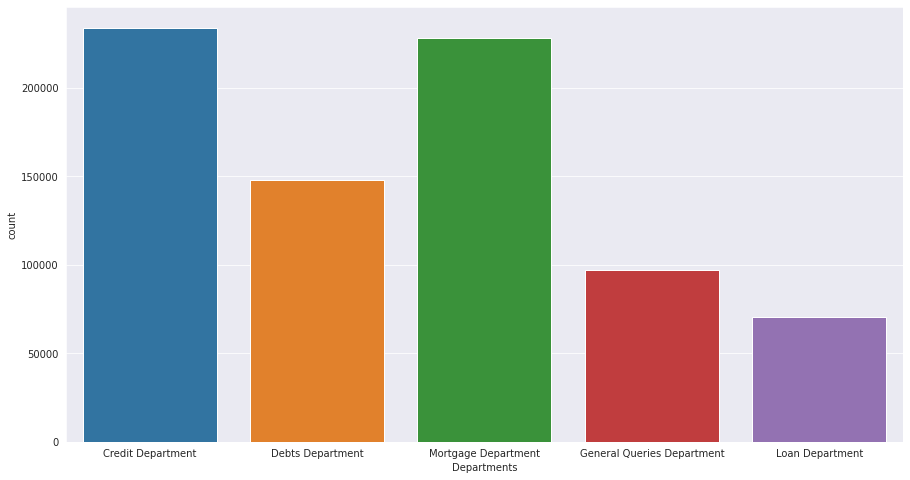

In [16]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,8))
sns.countplot(x='Departments',data=df)

# Text Pre-Processing

Converting to Lowercase

This converts the text to lower case by applying the lower() function.

In [17]:
#importing all the required libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import tokenize

df.Issue=df.Issue.apply(lambda x: x.lower())

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [18]:
df

,Issue,Departments
0,incorrect information on credit report,Credit Department
1,disclosure verification of debt,Debts Department
2,other,Credit Department
3,"loan modification,collection,foreclosure",Mortgage Department
4,credit determination,Credit Department
...,...,...
777954,other fee,Credit Department
777955,"loan servicing, payments, escrow account",Mortgage Department
777956,"loan modification,collection,foreclosure",Mortgage Department
777957,"loan servicing, payments, escrow account",Mortgage Department


Expanding Contractions (Expanding Short Forms of words)

The expand_contraction() function elaborates the short form words such as it's to it is, can't to cannot etc.

In [19]:
!pip install text_preprocessing
from text_preprocessing import expand_contraction

# Expanding contractions
def con(text):
  expand = expand_contraction(text)
  return expand

df.Issue=df.Issue.apply(con)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [20]:
df

,Issue,Departments
0,incorrect information on credit report,Credit Department
1,disclosure verification of debt,Debts Department
2,other,Credit Department
3,"loan modification,collection,foreclosure",Mortgage Department
4,credit determination,Credit Department
...,...,...
777954,other fee,Credit Department
777955,"loan servicing, payments, escrow account",Mortgage Department
777956,"loan modification,collection,foreclosure",Mortgage Department
777957,"loan servicing, payments, escrow account",Mortgage Department


Removing Punctuations

This function removes the punctuation marks such as . , ! : etc.

In [21]:
import string

def remove_punc(text):
    for i in string.punctuation:
        text=text.replace(i,' ')
   
    return text

df.Issue=df.Issue.apply(remove_punc)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [22]:
df

,Issue,Departments
0,incorrect information on credit report,Credit Department
1,disclosure verification of debt,Debts Department
2,other,Credit Department
3,loan modification collection foreclosure,Mortgage Department
4,credit determination,Credit Department
...,...,...
777954,other fee,Credit Department
777955,loan servicing payments escrow account,Mortgage Department
777956,loan modification collection foreclosure,Mortgage Department
777957,loan servicing payments escrow account,Mortgage Department


Removing StopWords

This function removes stop words such as “the”, “is”, “in”, “for”, “where”, “when”, “to”, “at” etc.

In [23]:
nltk.download('stopwords')
stopword_list=stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')
 
df.Issue=df.Issue.apply(lambda x : " ".join(x for x in x.split() if x not in stopword_list))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [24]:
df

,Issue,Departments
0,incorrect information credit report,Credit Department
1,disclosure verification debt,Debts Department
2,,Credit Department
3,loan modification collection foreclosure,Mortgage Department
4,credit determination,Credit Department
...,...,...
777954,fee,Credit Department
777955,loan servicing payments escrow account,Mortgage Department
777956,loan modification collection foreclosure,Mortgage Department
777957,loan servicing payments escrow account,Mortgage Department


# Text Representation

Building a word cloud to display the most frequent words from thier respective departments.

Most Frequent Words in Credit Department

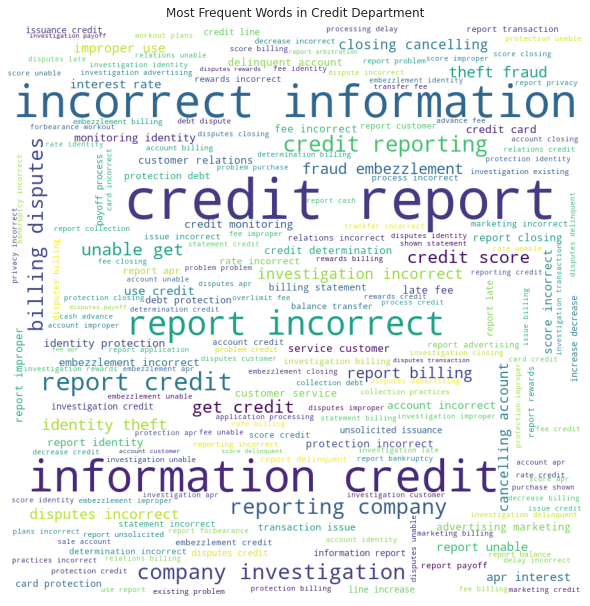

In [25]:
stop=stopwords.words('english')
from wordcloud import WordCloud
credit_words = ''
for values in df[df['Departments'] == 'Credit Department'].Issue:
    values = str(values)
    split_values = values.split()
    credit_words += " ".join(split_values)+ " "
    
WC = WordCloud(width = 900, height = 900, 
                background_color ='white', 
                stopwords = stop, 
                min_font_size = 10).generate(credit_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (15, 8), facecolor = None) 
plt.imshow(WC) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Most Frequent Words in Credit Department")
  
plt.show()

Most Frequent Words in Debt Department

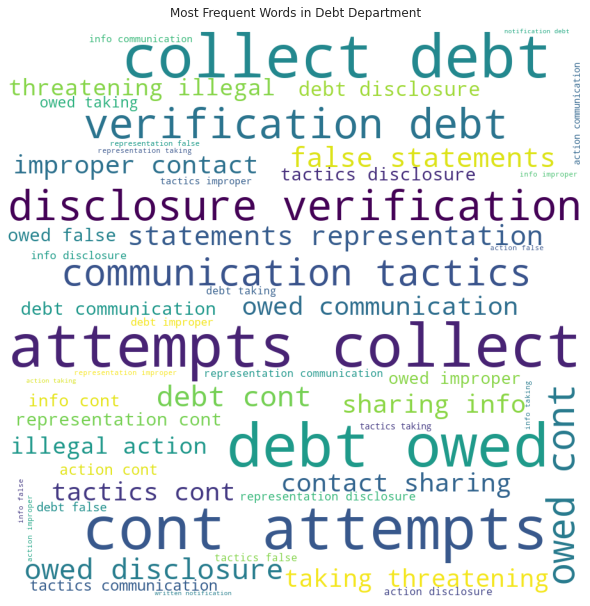

In [26]:
debt_words = ''
for values in df[df['Departments'] == 'Debts Department'].Issue:
    values = str(values)
    split_values = values.split()
    debt_words += " ".join(split_values)+ " "
    
WC = WordCloud(width = 900, height = 900, 
                background_color ='white', 
                stopwords = stop, 
                min_font_size = 10).generate(debt_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (15, 8), facecolor = None) 
plt.imshow(WC) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Most Frequent Words in Debt Department")
  
plt.show()

Most Frequent Words in Mortgage Department

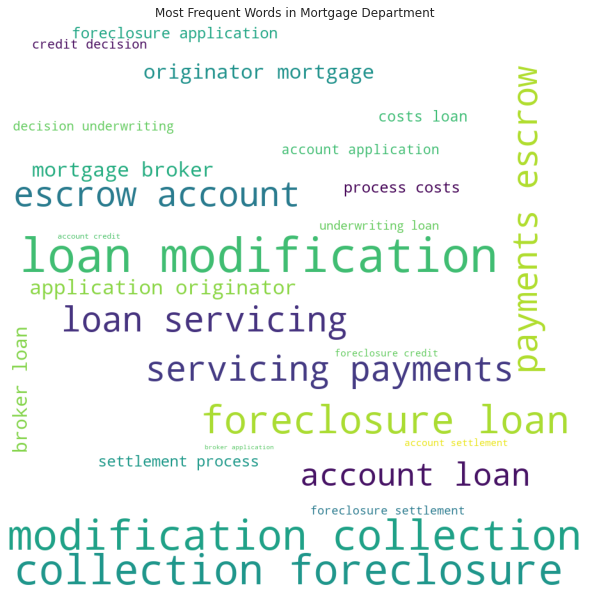

In [27]:
mortagage_words = ''
for values in df[df['Departments'] == 'Mortgage Department'].Issue:
    values = str(values)
    split_values = values.split()
    mortagage_words += " ".join(split_values)+ " "
    
WC = WordCloud(width = 900, height = 900, 
                background_color ='white', 
                stopwords = stop, 
                min_font_size = 10).generate(mortagage_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (15, 8), facecolor = None) 
plt.imshow(WC) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Most Frequent Words in Mortgage Department")
  
plt.show()

Most Frequent Words in General Queries Department

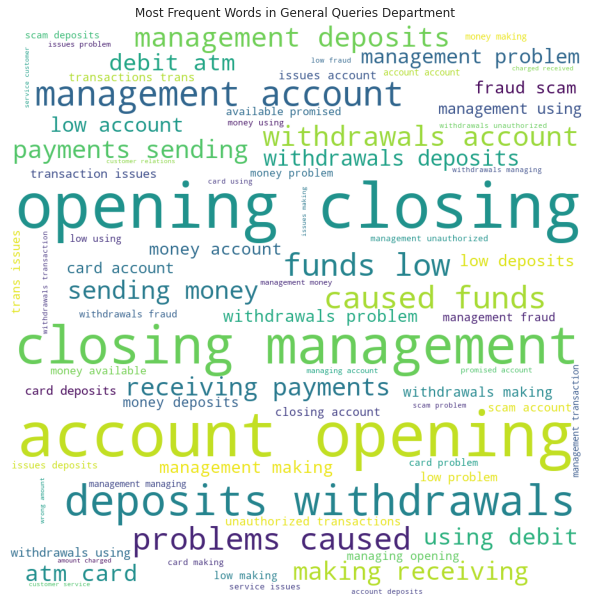

In [28]:
general_words = ''
for values in df[df['Departments'] == 'General Queries Department'].Issue:
    values = str(values)
    split_values = values.split()
    general_words += " ".join(split_values)+ " "
    
WC = WordCloud(width = 900, height = 900, 
                background_color ='white', 
                stopwords = stop, 
                min_font_size = 10).generate(general_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (15, 8), facecolor = None) 
plt.imshow(WC) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Most Frequent Words in General Queries Department")
  
plt.show()

Most Frequent Words in Loan Department

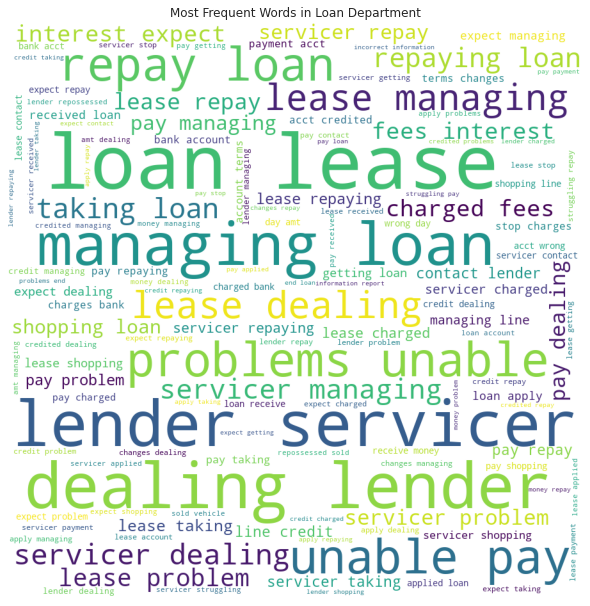

In [29]:
loan_words = ''
for values in df[df['Departments'] == 'Loan Department'].Issue:
    values = str(values)
    split_values = values.split()
    loan_words += " ".join(split_values)+ " "
    
WC = WordCloud(width = 900, height = 900, 
                background_color ='white', 
                stopwords = stop, 
                min_font_size = 10).generate(loan_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (15, 8), facecolor = None) 
plt.imshow(WC) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Most Frequent Words in Loan Department")
plt.show()

## Feature Extraction

We are using TF-IDF Vectorization method to extract the features based on term frequency and convert them from text to numbers. It creates a vocabulary based on uni-grams and bi-grams.

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df1.Issue).toarray()
labels = df1.PRODUCT
features.shape
labels.shape

(777959,)

## Feature Selection

It is used to extract the most corelated words in a document. We are using chi2 feature selection method to extract the features from thier respective departments.

In [31]:
df1['category_id'] = df1['PRODUCT'].factorize()[0]
from io import StringIO
category_id_df = df1[['PRODUCT', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'PRODUCT']].values)

In [32]:
from sklearn.feature_selection import chi2
import numpy as np
N = 10
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Product))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Credit Issues':
  . Most correlated unigrams:
. features
. false
. expect
. existing
. exchange
. excessive
. escrow
. end
. embezzlement
. disputes
  . Most correlated bigrams:
. false statements
. existing problem
. disclosures info
. existing mortgage
. exchange rate
. excessive fees
. escrow account
. end loan
. existing issue
. wrong day
# 'Debts Issues':
  . Most correlated unigrams:
. features
. false
. expect
. existing
. exchange
. excessive
. escrow
. end
. embezzlement
. disputes
  . Most correlated bigrams:
. false statements
. existing problem
. disclosures info
. existing mortgage
. exchange rate
. excessive fees
. escrow account
. end loan
. existing issue
. wrong day
# 'General Issues':
  . Most correlated unigrams:
. features
. false
. expect
. existing
. exchange
. excessive
. escrow
. end
. embezzlement
. disputes
  . Most correlated bigrams:
. false statements
. existing problem
. disclosures info
. existing mortgage
. exchange rate
. excessive fees
. escrow acco

## Building Supervised Classification Model

For building the classification models we are using multinomial naive bayes classification and SVM classification model.

We are using 80% of the data to train the models and 20% of the data to test the models.

We are using score() method to find the accuracy of the model and confusion matrix to evaluate the predicted query being routed to a particular department.

Multinomial Naive Bayes Classification

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
label=le.fit_transform(df['Departments'])

X_train, X_test, y_train, y_test = train_test_split(features,label,test_size = 0.2, random_state = 0)

clf = MultinomialNB().fit(X_train, y_train)

print("The accuracy of the trained model is {}".format(clf.score(X_test,y_test)))

y_pred=clf.predict(X_test)

print("The accuracy of the predicted model is {}".format(clf.predict_log_proba(X_test)))


The accuracy of the trained model is 0.9919211784667592
The accuracy of the predicted model is [[-2.13845841e+01 -6.50209042e-08 -2.00546835e+01 -1.65929817e+01
  -2.17514064e+01]
 [-1.65169899e-04 -1.11999846e+01 -1.05723210e+01 -9.93761956e+00
  -9.46466035e+00]
 [-3.25727534e-09 -2.62765902e+01 -2.47393243e+01 -1.96528281e+01
  -2.18667037e+01]
 ...
 [-3.25727534e-09 -2.62765902e+01 -2.47393243e+01 -1.96528281e+01
  -2.18667037e+01]
 [-2.49810000e+01 -2.67786357e+01 -2.59428345e+01 -2.24951094e+01
  -1.91928251e-10]
 [-1.92033935e+01 -9.02790731e-09 -2.03860552e+01 -1.97415320e+01
  -2.16747899e+01]]


Plotting of confusion matrix

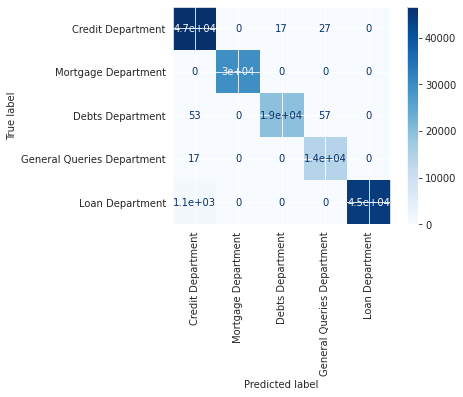

In [34]:
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
lab=['Credit Department', 'Mortgage Department', 'Debts Department','General Queries Department','Loan Department']
plot_confusion_matrix(clf,X_test, y_test,
                                 display_labels=lab,
                                 cmap=plt.cm.Blues,xticks_rotation = 'vertical')
plt.show()

Classification Report

In [35]:
from sklearn.metrics import classification_report
target_names = ['Credit Department', 'Mortgage Department', 'Debts Department','General Queries Department','Loan Department']

print(classification_report(y_test, y_pred,target_names=target_names))

                            precision    recall  f1-score   support

         Credit Department       0.98      1.00      0.99     46725
       Mortgage Department       1.00      1.00      1.00     29693
          Debts Department       1.00      0.99      1.00     19459
General Queries Department       0.99      1.00      1.00     14019
           Loan Department       1.00      0.98      0.99     45696

                  accuracy                           0.99    155592
                 macro avg       0.99      0.99      0.99    155592
              weighted avg       0.99      0.99      0.99    155592



SVM Classification

In [36]:
from sklearn.svm import LinearSVC
model = LinearSVC()
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=89)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test,y_test)

0.9920947092395496

Plotting of confusion matrix

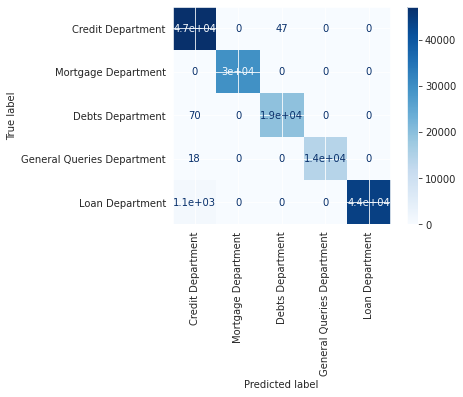

In [37]:
lab=['Credit Department', 'Mortgage Department', 'Debts Department','General Queries Department','Loan Department']
plot_confusion_matrix(model,X_test, y_test,
                                 cmap=plt.cm.Blues,ax=None,xticks_rotation = 'vertical',display_labels=lab)
plt.show()

## Prediction on Unknown Query

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(df['Issue'], df['Departments'], random_state = 0)
count_vect = CountVectorizer()
Model = MultinomialNB()
X1_train_counts = count_vect.fit_transform(X1_train)
tfidf_transformer = TfidfTransformer()
X1_train_tfidf = tfidf_transformer.fit_transform(X1_train_counts)
Model.fit(X1_train_tfidf, y1_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
import pickle
# Save the vectorizer
vec_file = '/content/drive/My Drive/vectorizer.pickle'
pickle.dump(count_vect, open(vec_file, 'wb'))

In [ ]:
rt = Model.predict(count_vect.transform(["I am a victim of identity theft and someone stole my identity and personal information to open up a Visa credit card account with Bank of America. The following Bank of America Visa credit card account do not belong to me : XXXX."]))
print("The the query is being routed to {} ".format(rt))



The the query is being routed to ['Credit Department'] 


## Building a LSTM Neural Network

We are using Tensorflow deep learning framework to build a Bi-directional LSTM   (Long Short Term Memory) neural network.

Text Vectorization

We are using tensorflow text vectorization method to extract the features from our data using TF-IDF method and n-grams.

After the extracting the features it converts the text to sequences in order to process with neural network.

It is applied on data using adapt() method to convert the text to sequences.

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing
data = df['Issue'].values
layer = preprocessing.TextVectorization(
    max_tokens=800000,ngrams=(1,2), output_mode='int',
    output_sequence_length=250,
)
layer.adapt(data)
X = layer(data)
print(X)

tf.Tensor(
[[13 14  3 ...  0  0  0]
 [44 42 17 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 2  9  7 ...  0  0  0]
 [ 2 20 18 ...  0  0  0]
 [ 2 20 18 ...  0  0  0]], shape=(777959, 250), dtype=int64)


The generated vocabulary using text vectorization

In [ ]:
layer.get_vocabulary()

['',
 '[UNK]',
 'loan',
 'credit',
 'account',
 'report',
 'credit report',
 'collection',
 'modification collection',
 'modification',
 'loan modification',
 'foreclosure',
 'collection foreclosure',
 'incorrect',
 'information',
 'incorrect information',
 'information credit',
 'debt',
 'payments',
 'servicing payments',
 'servicing',
 'payments escrow',
 'loan servicing',
 'escrow account',
 'escrow',
 'not',
 'owed',
 'not owed',
 'debt not',
 'collect debt',
 'collect',
 'attempts collect',
 'attempts',
 'cont attempts',
 'cont',
 'closing',
 'opening',
 'opening closing',
 'management',
 'closing management',
 'account opening',
 'verification debt',
 'verification',
 'disclosure verification',
 'disclosure',
 'tactics',
 'communication tactics',
 'communication',
 'withdrawals',
 'deposits withdrawals',
 'deposits',
 'loan lease',
 'lease',
 'problems',
 'unable',
 'reporting',
 'credit reporting',
 'lender',
 'mortgage',
 'servicer',
 'lender servicer',
 'dealing lender',
 'dea

Sequence Padding

It is used assign zeros to the imbalanced sequence to balance sequence. we are using post padding method. 

In [ ]:
X = tf.keras.preprocessing.sequence.pad_sequences(X, maxlen=250)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (777959, 250)


In [ ]:
Y = pd.get_dummies(df['Departments']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (777959, 5)


In [ ]:
print(Y)

[[1 0 0 0 0]
 [0 1 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


Splitting the Vectorized tokens to train and test

we are splitting 90% of the sequences to trainn the model and 10% of sequences to test the model.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(700163, 250) (700163, 5)
(77796, 250) (77796, 5)


LSTM neural network

We are creating a sequential model in which we are creating 128 input dimension of embedding layer to take the train sequences.

We are creating 128 layer LSTM layers to train the model.

We are using droppout layers to eliminate overfitting.

We are using softmax activation as output to classify between multi-classes.

In [ ]:
 model = tf.keras.Sequential([
    tf.keras.layers.Embedding(
        input_length=X.shape[1],
        output_dim=128,
        # Use masking to handle the variable sequence lengths
        mask_zero=True,input_dim = 800000),
    tf.keras.layers.SpatialDropout1D(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5, activation='softmax')
])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 250, 128)          102400000 
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 250, 128)          0         
_________________________________________________________________
bidirectional_4 (Bidirection (None, 250, 256)          263168    
_________________________________________________________________
dropout_4 (Dropout)          (None, 250, 256)          0         
_________________________________________________________________
bidirectional_5 (Bidirection (None, 256)               394240    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                

Compiling the model

We are using Adam optimizer and categorical crossentropy to complie the model. It assigns the pre-defined adam weights to the model. since it is multi-class classification model we are using categorical crossentropy as the loss function.

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Fitting the model with training set

We are using 3 epochs to train the model with monitoring the loss function.

We are using batch size of 256 for the model to be trained.

In [ ]:
from keras.callbacks import EarlyStopping
epochs = 3
batch_size = 256
history = model.fit(X_train, Y_train, epochs=epochs,validation_split=0.1,batch_size=batch_size,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/3
2462/2462 [==============================] - 4107s 2s/step - loss: 0.0962 - accuracy: 0.9721 - val_loss: 0.0199 - val_accuracy: 0.9922
Epoch 2/3
2462/2462 [==============================] - 4060s 2s/step - loss: 0.0190 - accuracy: 0.9922 - val_loss: 0.0166 - val_accuracy: 0.9922
Epoch 3/3
2462/2462 [==============================] - 4061s 2s/step - loss: 0.0161 - accuracy: 0.9924 - val_loss: 0.0159 - val_accuracy: 0.9922


 Saving the trained LSTM Model

In [ ]:
#tf.keras.models.save_model('/content/drive/My Drive/LSTM_model',save_format = "h5")
model.save('/content/drive/My Drive/model.h5')

# i need to save model in "h5" format to overcome the error.

Evaluating the model with test set

In [ ]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

2432/2432 [==============================] - 360s 148ms/step - loss: 0.0172 - accuracy: 0.9920
Test set
  Loss: 0.017
  Accuracy: 0.992


Plotting of Accuracy and Loss of the trained model

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

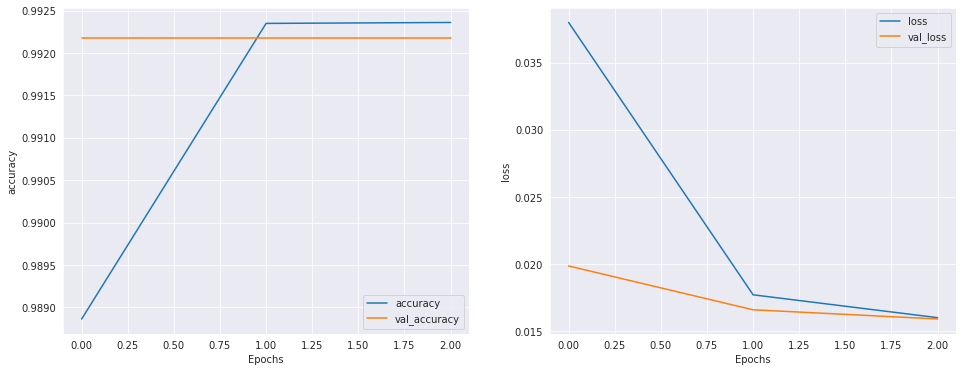

In [ ]:
from matplotlib import*
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plot_graphs(history, 'accuracy')
plt.subplot(1,2,2)
plot_graphs(history, 'loss')

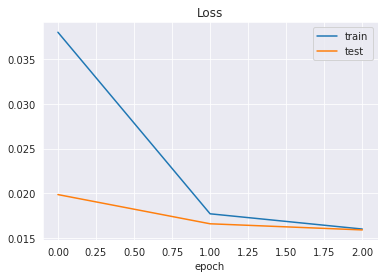

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
#plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show();

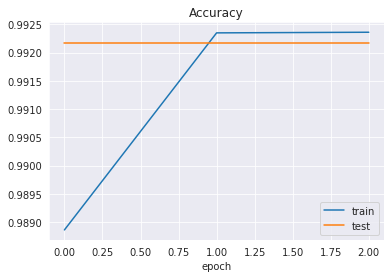

In [ ]:
plt.title('Accuracy')
plt.xlabel('epoch')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

## Prediction on Unknown Query using LSTM Model

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(lower=True,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
new_complaint = ['I am a victim of identity theft and someone stole my identity and personal information to open up a Visa credit card account with Bank of America. The following Bank of America Visa credit card account do not belong to me : XXXX.']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = tf.keras.preprocessing.sequence.pad_sequences(seq, maxlen=250)
pred = model.predict(padded)
labels = df['Departments']

In [ ]:
print("The Predicted probablities that query is routed to following departments{}".format(pred))

The Predicted probablities that query is routed to following departments[[0.62272954 0.00565727 0.01248969 0.01038119 0.34874234]]


In [ ]:
print(" The Query is being routed to {}".format(labels[np.argmax(pred)]))

 The Query is being routed to Credit Department


In conclusion, We can tell that our LSTM model has predicted that given query being a credit department query with 62% accuracy.

We deployed the trained the LSTM model into streamlit app which can be used in real-time customer support.

In improving the prediction accuracy we can use word2vec trained model which captures the similar words and train them accordingly to improve the model performance.



## Future Work

### Word2vec Model

We are using gensim based word2vec model to extract the similar words.

In [ ]:
from gensim.models import Word2Vec 

In [ ]:
vec=df['Issue'].values
vec

In [ ]:
tok_vec = [nltk.word_tokenize(vec1) for vec1 in vec]

tok_vec

## Building of Word2vec model using gensim

In [ ]:
model = Word2Vec(size=777959,min_count=1, workers=20,window = 2)

In [ ]:
# building Vocab
model.build_vocab(tok_vec)

In [ ]:
import time
# train the w2v model
start = time.time()
model.train(tok_vec, 
                total_examples=model.corpus_count, 
                epochs=model.epochs, 
                report_delay=1,
                compute_loss = True)
end = time.time()

In [ ]:
model.save("word2vec1.model")

## Loading the Word2Vec Model

In [ ]:
import gensim
vec_model = gensim.models.Word2Vec.load("/content/drive/My Drive/word2vec1.model")

In [ ]:
vec_model.wv.most_similar("collect")

[('owed', 0.5509717464447021),
 ('cont', 0.4806228280067444),
 ('expect', 0.440655380487442),
 ('notification', 0.42210859060287476),
 ('verification', 0.42093726992607117),
 ('protection', 0.4167262017726898),
 ('dispute', 0.40566059947013855),
 ('disclosure', 0.3921801447868347),
 ('stop', 0.360137403011322),
 ('credited', 0.31972432136535645)]

In [ ]:
vec_model.wv.most_similar("fraud")

[('embezzlement', 0.5351693630218506),
 ('monitoring', 0.4603976011276245),
 ('freezes', 0.4062296152114868),
 ('services', 0.34975481033325195),
 ('caused', 0.28312772512435913),
 ('charging', 0.24480867385864258),
 ('lender', 0.24379810690879822),
 ('dealing', 0.23140960931777954),
 ('security', 0.21331292390823364),
 ('cancelling', 0.2006617784500122)]

In [ ]:
vec_model.wv.most_similar("loan")

[('escrow', 0.3821050524711609),
 ('account', 0.32922273874282837),
 ('payments', 0.3031865358352661),
 ('sending', 0.2457004189491272),
 ('receiving', 0.23350723087787628),
 ('servicing', 0.23217177391052246),
 ('money', 0.169806569814682),
 ('illegal', 0.15468895435333252),
 ('foreclosure', 0.14736393094062805),
 ('fees', 0.12893253564834595)]

In [ ]:
vec_model.wv.most_similar("credit")

[('investigation', 0.4897112548351288),
 ('problem', 0.43378615379333496),
 ('score', 0.4306704103946686),
 ('existing', 0.4296967089176178),
 ('unable', 0.3765752911567688),
 ('report', 0.37104737758636475),
 ('company', 0.31231236457824707),
 ('incorrect', 0.3120793104171753),
 ('reporting', 0.26992255449295044),
 ('get', 0.20721465349197388)]

In [ ]:
vec_model.wv.most_similar("mortgage")

[('broker', 0.3829309344291687),
 ('application', 0.3677085041999817),
 ('bill', 0.32777756452560425),
 ('processing', 0.31971508264541626),
 ('relations', 0.27101069688796997),
 ('delay', 0.2678908705711365),
 ('refinancing', 0.2448318749666214),
 ('debit', 0.24117431044578552),
 ('applying', 0.22429218888282776),
 ('sharing', 0.220707967877388)]